<a href="https://colab.research.google.com/github/YashGupta2911/road-surface-damage-detection-using-deep-learning/blob/main/yashu_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
from time import sleep as s
import cv2
import os
import pandas as pd
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset = train.flow_from_directory( "/content/drive/MyDrive/Namlini/Data_base/train",
                                          target_size= (400,400),
                                          batch_size= 16,
                                          class_mode="categorical")

validation_dataset = train.flow_from_directory( "/content/drive/MyDrive/Namlini/Data_base/validation",
                                          target_size= (400,400),
                                          batch_size= 16)

test_dataset = train.flow_from_directory( "/content/drive/MyDrive/Namlini/Data_base/test",
                                          target_size= (400,400),
                                          batch_size= 4)

Found 2094 images belonging to 4 classes.
Found 300 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


In [4]:
train_dataset.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [11]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(128,(3,3),activation ="relu", input_shape =(400,400,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation ="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation ="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation ="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    # tf.keras.layers.Conv2D(64,(3,3),activation ="relu"),
    # tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(4,activation ="softmax")])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 398, 398, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 199, 199, 128)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 197, 197, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 98, 98, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 128)     

In [14]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" ,metrics =["accuracy"])

In [15]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch= 30,
                     epochs= 50,
                     validation_data= validation_dataset)

Epoch 1/50
30/30 [==============================] - 12s 362ms/step - loss: 1.2986 - accuracy: 0.3625 - val_loss: 1.1712 - val_accuracy: 0.2333
Epoch 2/50
30/30 [==============================] - 11s 350ms/step - loss: 1.1488 - accuracy: 0.4062 - val_loss: 1.1383 - val_accuracy: 0.4067
Epoch 3/50
30/30 [==============================] - 11s 350ms/step - loss: 1.1328 - accuracy: 0.4208 - val_loss: 1.1248 - val_accuracy: 0.4100
Epoch 4/50
30/30 [==============================] - 11s 350ms/step - loss: 1.1366 - accuracy: 0.4104 - val_loss: 1.1049 - val_accuracy: 0.4033
Epoch 5/50
30/30 [==============================] - 11s 349ms/step - loss: 1.1451 - accuracy: 0.4229 - val_loss: 1.1072 - val_accuracy: 0.4967
Epoch 6/50
30/30 [==============================] - 10s 347ms/step - loss: 1.1391 - accuracy: 0.4437 - val_loss: 1.1121 - val_accuracy: 0.4067
Epoch 7/50
30/30 [==============================] - 10s 348ms/step - loss: 1.0847 - accuracy: 0.4268 - val_loss: 1.0823 - val_accuracy: 0.4667

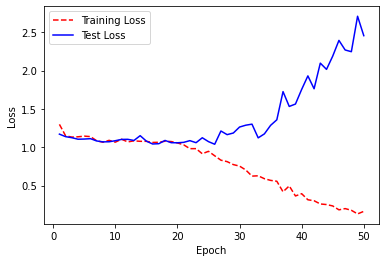

In [16]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = model_fit.history['loss']
test_loss = model_fit.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

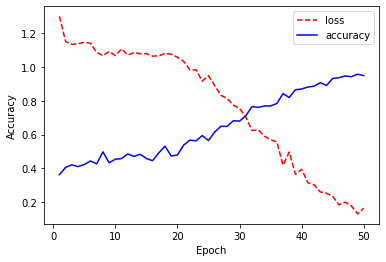

In [17]:
loss = model_fit.history['loss']
accuracy = model_fit.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['loss', 'accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();